In [25]:
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt

# Step 1: Generate and save a Matplotlib plot
def generate_plot():
    # Sample data
    x = [1, 2, 3, 4, 5]
    y = [10, 20, 25, 30, 40]

    plt.figure(figsize=(5, 4))
    plt.plot(x, y, marker='o')
    plt.title('Sample Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    
    # Save the plot as an image file
    plt.savefig('plot.png')
    plt.close()

# Step 2: Create a PowerPoint slide with text and the plot
def create_pptx(prs,txt):
    # Add a blank slide layout
    slide_layout = prs.slide_layouts[6]  # 6 is for a blank slide
    slide = prs.slides.add_slide(slide_layout)
    
    # Add text box on the left
    left = Inches(0.5)
    top = Inches(.5)
    width = Inches(7)
    height = Inches(4)
    text_box = slide.shapes.add_textbox(left, top, width, height)
    text_frame = text_box.text_frame
    text_frame.word_wrap = True
    p = text_frame.paragraphs[0]
    p.text = txt
#     p.alignment = PP_PARAGRAPH_ALIGNMENT.CENTER
    p.font.size = Pt(16)  # Reduced from 28
#     text_frame.text =txt

    # Add the plot image on the right
    img_path = 'plot.png'
    left = Inches(.5)
    top = Inches(4)
    height = Inches(4.5)
    slide.shapes.add_picture(img_path, left, top, height=height)
    
        # Add the plot image on the right
    img_path = 'plot2.png'
    left = Inches(8)
    top = Inches(.5)
    height = Inches(8)
    slide.shapes.add_picture(img_path, left, top, height=height)



In [26]:
# Create a presentation object
prs = Presentation()
# Set slide dimensions to 16:9 aspect ratio
prs.slide_width = Inches(16)
prs.slide_height = Inches(9)

# Generate the plot and create the PowerPoint slide
# generate_plot()
txt="""
Zone 1 ctr(71, 100) AD=7.06 skew=0.20 D2:0.00
Zone 2 ctr(100, 99) AD=12.44 skew=0.07 D2:0.00
Zone 3 ctr(140, 99) AD=13.39 skew=0.48 D2:0.00
Zone 4 ctr(52, 99) AD=15.42 skew=0.07 D2:0.00
Zone 5 ctr(97, 97) AD=15.74 skew=0.17 D2:0.00
Zone 6 ctr(137, 97) AD=7.97 skew=0.05 D2:1.00
Zone 7 ctr(63, 101) AD=13.14 skew=0.06 D2:0.00
Zone 8 ctr(96, 101) AD=12.79 skew=0.12 D2:0.00
Zone 9 ctr(93, 100) AD=21.17 skew=0.11 D2:0.00
"""
create_pptx(prs,txt)

# Save the presentation
prs.save('presentation.pptx')

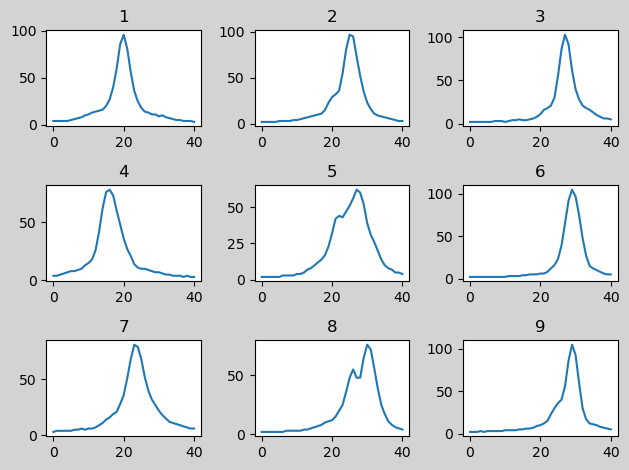

In [6]:

import numpy as np
from locate_cross import locate_cross
from matplotlib import pyplot as plt

x1, x2, x3, x4, x5, x6 = 1050, 1263, 1319, 1530, 1584, 1794
y1, y2, y3, y4, y5, y6 = 173, 384, 501, 714, 824, 1038
subs = [(x1, y1, x2, y2), (x3, y1, x4, y2), (x5, y1, x6, y2),
        (x1, y3, x2, y4), (x3, y3, x4, y4), (x5, y3, x6, y4),
        (x1, y5, x2, y6), (x3, y5, x4, y6), (x5, y5, x6, y6)]
a=np.load('4.npy')

i=0
fig,axs=plt.subplots(3,3)
for x1, y1, x2, y2 in subs:
    sub = a[y1:y2, x1:x2]
    r = locate_cross(sub, cross_cnt=1)
    x, y = r[0]
    l = [sub[y + 20][_] for _ in range(x - 20, x + 21)]
    ax=axs[int(i/3)][i%3]
    ax.plot(l)
    i+=1
#     ax.set_title(str(i))
    
    
plt.tight_layout()    
# Customize the outer frame
# fig.patch.set_facecolor('lightgrey') 
plt.show()

In [22]:
i=0
fig,axs=plt.subplots(3,3)
for x1, y1, x2, y2 in subs:
    sub = a[y1:y2, x1:x2]
    r = locate_cross(sub, cross_cnt=1)
    x, y = r[0]
    for dy in [-40,-20,20,40]:
        l = [sub[y + dy][_] for _ in range(x - 20, x + 21)]
        x0 = x - 20 + l.index(max(l))
        l = [sub[y + dy][_] for _ in range(x0 - 20, x0 + 20)]
        ax=axs[int(i/3)][i%3]
        ax.plot(l,alpha=.5)
    i+=1
#     ax.set_title(str(i))
    
    
plt.tight_layout()    
# Customize the outer frame
# fig.patch.set_facecolor('lightgrey') 
# Save the plot as an image file
plt.savefig('plot.png')
plt.close()

In [17]:
from PIL import Image
def save_2d_array_as_png(array, filename):
    # Ensure the array is in the correct format
    array = np.asarray(array, dtype=np.uint8)
    
    # Convert the 2D array to a grayscale (L mode) image
    image = Image.fromarray(array, mode='L')
    
    # Save the image as a PNG file
    image.save(filename)

In [23]:
save_2d_array_as_png(a[114:1050,1032:1811],'plot2.png')